In [2]:
%matplotlib inline
import os, pickle
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

RAW_PATH = "/data2/zhoujb/project/cowpea_project/rawData/"
SNP_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/snpDir/"
CLUSTER_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/SNPMMSeqCluster/"
RES_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/Result/"
FIG_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/plotFigure/"

In [3]:
raw_info = pd.read_table(os.path.join(RES_PATH, "Haplotype_Counts_Info.tsv"))
raw_info.shape

(12652, 17)

In [4]:
raw_info.head()

,Haplotype_id,Haplotype_class,Chr,Start,End,Genotyped_total_num,Genotyped_sample_num,Genotyped_prop,VL_total_num,VL_sample_num,VL_prop,G_total_num,G_sample_num,G_prop,VC_total_num,VC_sample_num,VC_prop
0,Chr01_51400001_51530000_218_IH_D367,IH-VLIH-GVH-VCPH,Chr01,51400001,51530000,332,218,0.656627,159,106,0.666667,82,32,0.390244,79,73,0.924051
1,Chr01_51400001_51530000_1_NH_D403,NH-VLNH-GNH-VCNH,Chr01,51400001,51530000,332,1,0.003012,159,1,0.006289,82,0,0.000000,79,0,0.000000
2,Chr01_51400001_51530000_2_NH_D610,NH-VLNH-GNH-VCNH,Chr01,51400001,51530000,332,2,0.006024,159,2,0.012579,82,0,0.000000,79,0,0.000000
3,Chr01_51400001_51530000_1_NH_D614,NH-VLNH-GNH-VCNH,Chr01,51400001,51530000,332,1,0.003012,159,1,0.006289,82,0,0.000000,79,0,0.000000
4,Chr01_51400001_51530000_47_NH_D628,NH-VLNH-GNH-VCNH,Chr01,51400001,51530000,332,47,0.141566,159,31,0.194969,82,10,0.121951,79,4,0.050633


In [5]:
total_range = raw_info[["Genotyped_prop"]].copy()
total_range["Total_range"] = pd.cut(raw_info["Genotyped_prop"], 
                                    bins=[round(x,3) for x in np.arange(0, 1.05, 0.05)],
                                    labels=["{:g}-{:g}%".format(x*100, (x+0.05)*100) for x in np.arange(0, 1, 0.05)],
                                   )
total_range_count = total_range["Total_range"].value_counts().to_frame()
total_range_count = total_range_count.loc[["{:g}-{:g}%".format(x*100, (x+0.05)*100) for x in np.arange(0, 1, 0.05)]]
total_range_count = total_range_count.reset_index()
total_range_count["Total_range"] = total_range_count["Total_range"].astype(object)
#total_range_count.T.to_excel(os.path.join(RES_PATH, "total_freq.xlsx"))

In [6]:
total_range_count

,Total_range,count
0,0-5%,10973
1,5-10%,544
2,10-15%,145
3,15-20%,92
4,20-25%,45
5,25-30%,22
6,30-35%,14
7,35-40%,8
8,40-45%,4
9,45-50%,0


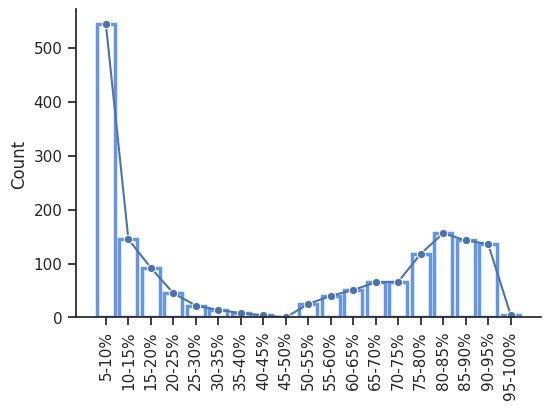

In [7]:
total_range = raw_info[["Genotyped_prop"]].copy()
total_range["Total_range"] = pd.cut(raw_info["Genotyped_prop"], 
                                    bins=[round(x,3) for x in np.arange(0, 1.05, 0.05)],
                                    labels=["{:g}-{:g}%".format(x*100, (x+0.05)*100) for x in np.arange(0, 1, 0.05)],
                                   )
total_range_count = total_range["Total_range"].value_counts().to_frame()
total_range_count = total_range_count.loc[["{:g}-{:g}%".format(x*100, (x+0.05)*100) for x in np.arange(0, 1, 0.05)]]
total_range_count = total_range_count.reset_index()
total_range_count["Total_range"] = total_range_count["Total_range"].astype(object)
total_range_count = total_range_count[total_range_count["Total_range"]!="0-5%"]

sns.set(font_scale=1, rc={'figure.figsize':(6,4)}, style="ticks")
g = sns.barplot(total_range_count, x="Total_range", y="count", linewidth=2.5, edgecolor="cornflowerblue", facecolor=(0, 0, 0, 0),)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


sns.lineplot(data = total_range_count, x="Total_range", y="count", marker='o', sort = False, ax=g)

g.set(xlabel="", ylabel="Count")
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)

plt.savefig(os.path.join(FIG_PATH, '1-total_bar_plot.pdf'), format='pdf', bbox_inches='tight', transparent=True)

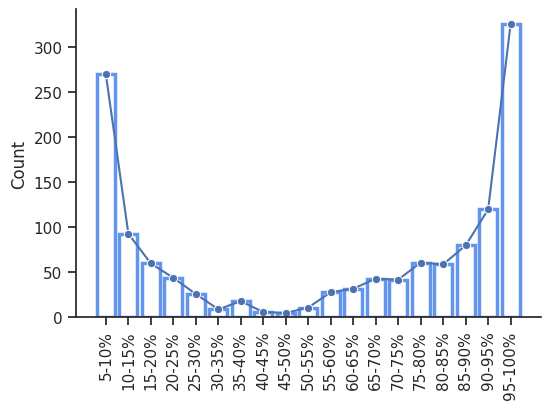

In [8]:
total_range = raw_info[["VL_prop"]].copy()
total_range["Total_range"] = pd.cut(raw_info["VL_prop"], 
                                    bins=[round(x,3) for x in np.arange(0, 1.05, 0.05)],
                                    labels=["{:g}-{:g}%".format(x*100, (x+0.05)*100) for x in np.arange(0, 1, 0.05)],
                                   )
total_range_count = total_range["Total_range"].value_counts().to_frame()
total_range_count = total_range_count.loc[["{:g}-{:g}%".format(x*100, (x+0.05)*100) for x in np.arange(0, 1, 0.05)]]
total_range_count = total_range_count.reset_index()
total_range_count["Total_range"] = total_range_count["Total_range"].astype(object)
total_range_count = total_range_count[total_range_count["Total_range"]!="0-5%"]

sns.set(font_scale=1, rc={'figure.figsize':(6,4)}, style="ticks")
g = sns.barplot(total_range_count, x="Total_range", y="count", linewidth=2.5, edgecolor="cornflowerblue", facecolor=(0, 0, 0, 0),)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


sns.lineplot(data = total_range_count, x="Total_range", y="count", marker='o', sort = False, ax=g)

g.set(xlabel="", ylabel="Count")
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)

plt.savefig(os.path.join(FIG_PATH, '2-VL_bar_plot.pdf'), format='pdf', bbox_inches='tight', transparent=True)

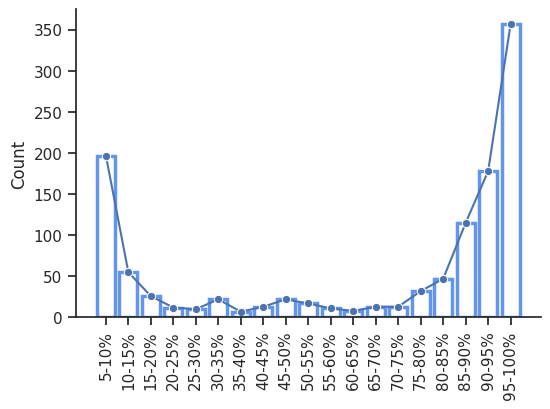

In [9]:
total_range = raw_info[["VC_prop"]].copy()
total_range["Total_range"] = pd.cut(raw_info["VC_prop"], 
                                    bins=[round(x,3) for x in np.arange(0, 1.05, 0.05)],
                                    labels=["{:g}-{:g}%".format(x*100, (x+0.05)*100) for x in np.arange(0, 1, 0.05)],
                                   )
total_range_count = total_range["Total_range"].value_counts().to_frame()
total_range_count = total_range_count.loc[["{:g}-{:g}%".format(x*100, (x+0.05)*100) for x in np.arange(0, 1, 0.05)]]
total_range_count = total_range_count.reset_index()
total_range_count["Total_range"] = total_range_count["Total_range"].astype(object)
total_range_count = total_range_count[total_range_count["Total_range"]!="0-5%"]

sns.set(font_scale=1, rc={'figure.figsize':(6,4)}, style="ticks")
g = sns.barplot(total_range_count, x="Total_range", y="count", linewidth=2.5, edgecolor="cornflowerblue", facecolor=(0, 0, 0, 0),)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


sns.lineplot(data = total_range_count, x="Total_range", y="count", marker='o', sort = False, ax=g)

g.set(xlabel="", ylabel="Count")
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)

plt.savefig(os.path.join(FIG_PATH, '2-VC_bar_plot.pdf'), format='pdf', bbox_inches='tight', transparent=True)

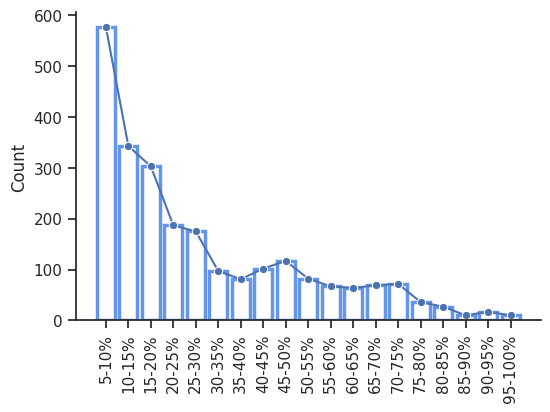

In [10]:
total_range = raw_info[["G_prop"]].copy()
total_range["Total_range"] = pd.cut(raw_info["G_prop"], 
                                    bins=[round(x,3) for x in np.arange(0, 1.05, 0.05)],
                                    labels=["{:g}-{:g}%".format(x*100, (x+0.05)*100) for x in np.arange(0, 1, 0.05)],
                                   )
total_range_count = total_range["Total_range"].value_counts().to_frame()
total_range_count = total_range_count.loc[["{:g}-{:g}%".format(x*100, (x+0.05)*100) for x in np.arange(0, 1, 0.05)]]
total_range_count = total_range_count.reset_index()
total_range_count["Total_range"] = total_range_count["Total_range"].astype(object)
total_range_count = total_range_count[total_range_count["Total_range"]!="0-5%"]

sns.set(font_scale=1, rc={'figure.figsize':(6,4)}, style="ticks")
g = sns.barplot(total_range_count, x="Total_range", y="count", linewidth=2.5, edgecolor="cornflowerblue", facecolor=(0, 0, 0, 0),)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


sns.lineplot(data = total_range_count, x="Total_range", y="count", marker='o', sort = False, ax=g)

g.set(xlabel="", ylabel="Count")
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)

plt.savefig(os.path.join(FIG_PATH, '2-G_bar_plot.pdf'), format='pdf', bbox_inches='tight', transparent=True)